# Capitulo 5 - Scikit-learn
## Construção de um modelo de aprendizado não supervisionado (clustering) 

Em tarefas de aprendizagem não supervisionada como o agrupamento, os dados não possuem um label e cabe ao algoritmo descrobrir automaticamente como os dados se agrupam. No K-means, um dos algoritmos mais tradicionais para agrupamento, isso é feito pelas medidas de distância dos pontos de dados para os centróides. 

Não há uma classificação final e cabe ao analista definir o que cada cluster representa, a partir da observação do "perfil" de cada cluster. A seguir mostramos um exemplo de código com a implementação do K-Means usando o Sckit-learn  <br/>
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Para construir esse modelo vamos utilizar a base de dados "Consumo de energia elétrica residencial individual" (Individual household electric power consumption Data Set) <br/>
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

1. Carregamento do conjunto de dados

In [2]:
import pandas as pd
data = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


2. Pré-processamento dos dados: <br/>
    * Seleção dos atributos que serão utilizadas para construir o modelo
    * Remoção dos registros com valores nulos
    * Reamostragem do conjunto de dados
    * Redução de dimensionalidade utilizando a técnica PCA
         * Transforma todos os atributos preditivos do conjunto de dados em componentes principais que “conservam a maior parte da informação” do conjunto de dados original. 


In [5]:
power_consumption = data.iloc[0:, 2:9].dropna()
power_consumption.shape

from sklearn.utils import resample
data = resample(power_consumption, n_samples=5000)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components = 2).fit_transform(data)

3. Criação e treinamento do modelo

O algoritmo K-Means agrupa dados tentando separar amostras em k grupos similares. Esse algoritmo requer que o número de grupos (parametro k) seja especificado. 

K-Means se adapta bem a um grande número de amostras e foi usado em uma grande variedade de áreas de aplicação em muitos campos diferentes.

In [10]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4)
k_means.fit(pca_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

4. Avaliação do modelo <br/>
    Para avaliarmos o resultado do agrupamento, podemos construir gráfico utilizando o Matplolib. 

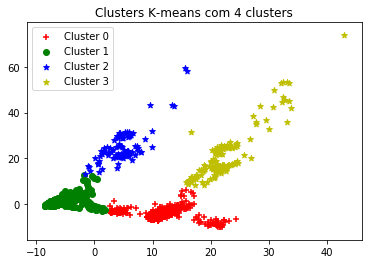

In [11]:
import matplotlib.pyplot as plt

for i in range(0, pca_2d.shape[0]):
    if k_means.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif k_means.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif k_means.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif k_means.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='*')
        plt.legend([c1, c2, c3, c4],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
        plt.title('Clusters K-means com 4 clusters')
plt.show()

Outra forma de avaliar o resultado do agrupamento realizado pelo modelo é calcular o Silhouette Score (Coeficiente de Silhueta ).

O Coeficiente de Silhueta é calculado usando a distância intra-cluster média (a) e a distância média do cluster mais próximo (b) para cada amostra. A função silhouette_score retorna o score da silhueta médio em todas as amostras

O melhor score é 1 e o pior score é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [14]:
from sklearn.metrics import silhouette_score
labels = k_means.labels_
silhouette_score(pca_2d, labels, metric = 'euclidean')

0.8641746257469256